# The Bayesian Bandits Problem

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from scipy.stats import randint
from scipy.stats import binom

# our usual update function
def update(distribution, likelihood):
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

In [12]:
p_dist = pd.DataFrame(index = np.arange(101)/100)
p_dist['probs'] = randint(0, 101).pmf(np.arange(101))

beliefs = [p_dist.copy() for i in range(4)]

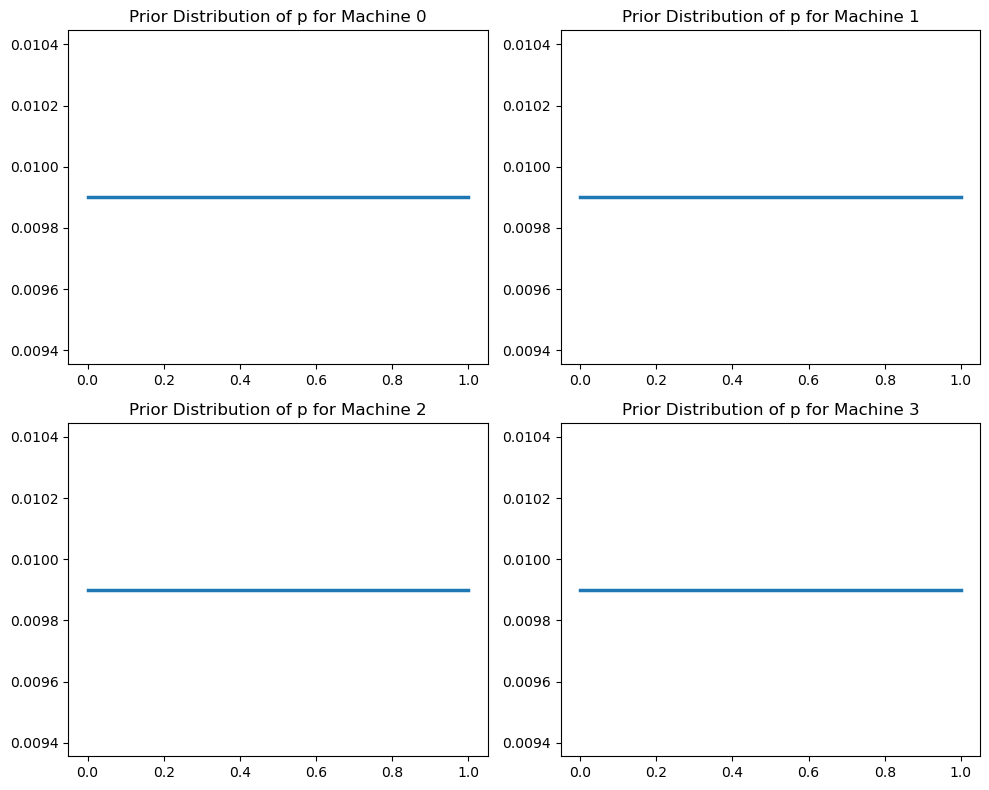

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# Plot data on each subplot
ax1.plot(beliefs[0].index, beliefs[0]['probs'], linewidth=2.5)
ax1.set_title('Prior Distribution of p for Machine 0')

ax2.plot(beliefs[1].index, beliefs[1]['probs'], linewidth=2.5)
ax2.set_title('Prior Distribution of p for Machine 1')

ax3.plot(beliefs[2].index, beliefs[2]['probs'], linewidth=2.5)
ax3.set_title('Prior Distribution of p for Machine 2')

ax4.plot(beliefs[3].index, beliefs[3]['probs'], linewidth=2.5)
ax4.set_title('Prior Distribution of p for Machine 3')

# Adjust layout
plt.tight_layout()
plt.show()

## Update #1

In [20]:
bandit = p_dist.copy()
for outcome in 'WLLLLLLLLL':
    if outcome == 'W':
        update(bandit, bandit.index)
    elif outcome == 'L':
        update(bandit, 1-bandit.index)
    else:
        print('Bad data!')

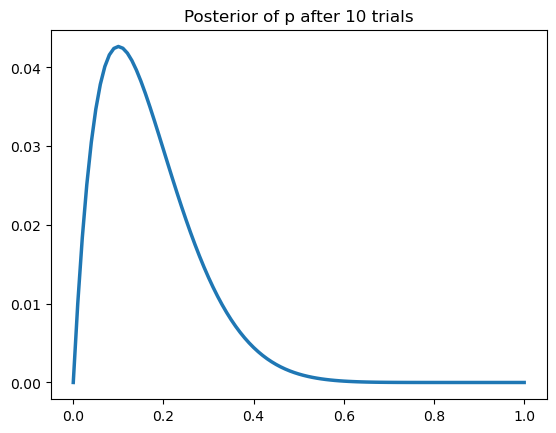

In [26]:
plt.plot(bandit.index, bandit['probs'], linewidth=2.5)
plt.title("Posterior of p after 10 trials")
plt.show()


## Multiple Bandits

In [27]:
actual_probs = [0.10, 0.20, 0.30, 0.40]

from collections import Counter

# count how many times we've played each machine
counter = Counter()

def play(i):
    """Play machine i.
    
    i: index of the machine to play
    
    returns: string 'W' or 'L'
    """
    counter[i] += 1
    p = actual_probs[i]
    if np.random.random() < p:
        return 'W'
    else:
        return 'L'

In [30]:
# Play 10 times

for i in range(4):
    for _ in range(10):
        outcome = play(i)
        if outcome == 'W':
            update(beliefs[i], bandit.index)
        elif outcome == 'L':
            update(beliefs[i], 1-bandit.index)
        else:
            print('Bad data!')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))


# Plot data on each subplot
ax1.plot(beliefs[0].index, beliefs[0]['probs'], linewidth=2.5)
ax1.set_title('Prior Distribution of p for Machine 0')

ax2.plot(beliefs[1].index, beliefs[1]['probs'], linewidth=2.5)
ax2.set_title('Prior Distribution of p for Machine 1')

ax3.plot(beliefs[2].index, beliefs[2]['probs'], linewidth=2.5)
ax3.set_title('Prior Distribution of p for Machine 2')

ax4.plot(beliefs[3].index, beliefs[3]['probs'], linewidth=2.5)
ax4.set_title('Prior Distribution of p for Machine 3')

# Adjust layout
plt.tight_layout()
plt.show()

## Explore and Exploit

In [31]:
def choose(beliefs):
    """Use Thompson sampling to choose a machine.
    
    Draws a single sample from each distribution.
    
    returns: index of the machine that yielded the highest value
    """
    ps = [np.random.choice(b.index,p=b['probs']) for b in beliefs]
    return np.argmax(ps)

In [33]:
choose(beliefs)

3

## The Strategy

In [34]:
def choose_play_update(beliefs):
    """Choose a machine, play it, and update beliefs."""
    
    # choose a machine
    machine = choose(beliefs)
    
    # play it
    outcome = play(machine)
    
    # update beliefs
    if outcome == 'W':
        update(beliefs[machine], bandit.index)
    elif outcome == 'L':
        update(beliefs[machine], 1-bandit.index)
    else:
        print('Bad data!')

In [35]:
beliefs = [p_dist.copy() for i in range(4)]
counter = Counter()

num_plays = 100

for i in range(num_plays):
    choose_play_update(beliefs)

In [36]:
def summarize_counter(counter):
    """Report the number of times each machine was played.
    
    counter: Collections.Counter
    
    returns: DataFrame
    """
    index = range(4)
    columns = ['Actual P(win)', 'Times played']
    df = pd.DataFrame(index=index, columns=columns)
    for i, count in counter.items():
        df.loc[i] = actual_probs[i], count
    return df

summarize_counter(counter)

,Actual P(win),Times played
0,0.1,8
1,0.2,7
2,0.3,58
3,0.4,27
